## DSBDAL Assignment 4

## Data analytics I

#### Importing required libraries

In [21]:
import pandas as pd
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split



#### Loading the dataset

In [22]:
temp = load_boston()
print(temp.DESCR)
features = temp.feature_names

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Loading the dataset into a dataframe

In [23]:
data = pd.DataFrame(temp.data, columns=temp.feature_names)
data['MEDV'] = temp.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
data.shape

(506, 14)

#### Checking for missing values

In [25]:
missing_values_count = data.isnull().sum() ## summing up the null value counts for all columns 
missing_values_count[0:13]

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Checking the datatypes of all the variables

In [26]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

#### Plotting the data

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <BarContainer object of 10 artists>)

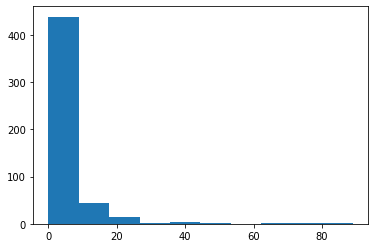

In [39]:
plt.hist(data['CRIM'], bins=10)

(array([372.,  12.,  48.,  16.,  13.,   6.,   4.,   6.,  19.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

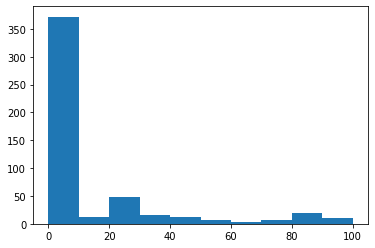

In [41]:
plt.hist(data['ZN'], bins=10)

(array([ 17.,  39.,  51.,  44.,  51.,  48.,  20.,  24.,   5.,  15.,   3.,
          0., 132.,   0.,  30.,  15.,   0.,   0.,   7.,   5.]),
 array([ 0.46 ,  1.824,  3.188,  4.552,  5.916,  7.28 ,  8.644, 10.008,
        11.372, 12.736, 14.1  , 15.464, 16.828, 18.192, 19.556, 20.92 ,
        22.284, 23.648, 25.012, 26.376, 27.74 ]),
 <BarContainer object of 20 artists>)

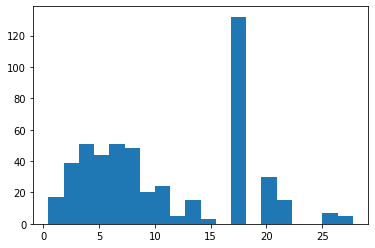

In [44]:
plt.hist(data['INDUS'], bins=20)

(array([471.,   0.,   0.,   0.,  35.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

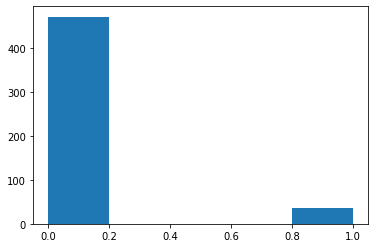

In [46]:
plt.hist(data['CHAS'], bins=5)

(array([26., 49., 60., 20., 45., 44., 53.,  7., 37., 41., 15., 15., 33.,
        24., 13.,  8.,  0.,  0.,  0., 16.]),
 array([0.385 , 0.4093, 0.4336, 0.4579, 0.4822, 0.5065, 0.5308, 0.5551,
        0.5794, 0.6037, 0.628 , 0.6523, 0.6766, 0.7009, 0.7252, 0.7495,
        0.7738, 0.7981, 0.8224, 0.8467, 0.871 ]),
 <BarContainer object of 20 artists>)

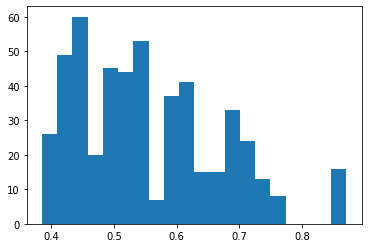

In [47]:
plt.hist(data['NOX'], bins=20)

(array([  1.,   1.,   2.,   2.,   2.,  12.,   9.,  36.,  71., 106.,  90.,
         61.,  40.,  29.,  16.,   6.,   9.,   4.,   6.,   3.]),
 array([3.561  , 3.82195, 4.0829 , 4.34385, 4.6048 , 4.86575, 5.1267 ,
        5.38765, 5.6486 , 5.90955, 6.1705 , 6.43145, 6.6924 , 6.95335,
        7.2143 , 7.47525, 7.7362 , 7.99715, 8.2581 , 8.51905, 8.78   ]),
 <BarContainer object of 20 artists>)

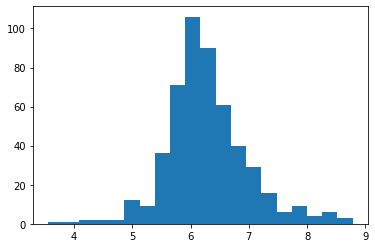

In [48]:
plt.hist(data['RM'], bins=20)

(array([  7.,   7.,   9.,  22.,   6.,  23.,  24.,  18.,  18.,  14.,  20.,
         18.,  17.,  22.,  19.,  23.,  34.,  37.,  57., 111.]),
 array([  2.9  ,   7.755,  12.61 ,  17.465,  22.32 ,  27.175,  32.03 ,
         36.885,  41.74 ,  46.595,  51.45 ,  56.305,  61.16 ,  66.015,
         70.87 ,  75.725,  80.58 ,  85.435,  90.29 ,  95.145, 100.   ]),
 <BarContainer object of 20 artists>)

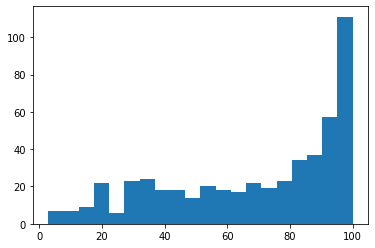

In [49]:
plt.hist(data['AGE'], bins=20)

(array([58., 92., 68., 43., 44., 37., 29., 32., 19., 27., 11., 15., 13.,
         6.,  7.,  0.,  0.,  4.,  0.,  1.]),
 array([ 1.1296  ,  1.679445,  2.22929 ,  2.779135,  3.32898 ,  3.878825,
         4.42867 ,  4.978515,  5.52836 ,  6.078205,  6.62805 ,  7.177895,
         7.72774 ,  8.277585,  8.82743 ,  9.377275,  9.92712 , 10.476965,
        11.02681 , 11.576655, 12.1265  ]),
 <BarContainer object of 20 artists>)

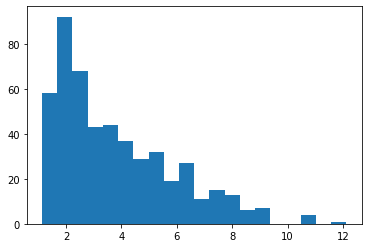

In [50]:
plt.hist(data['DIS'], bins=20)

(array([ 44.,  38., 110., 115.,  26.,  17.,  24.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 132.]),
 array([ 1.  ,  2.15,  3.3 ,  4.45,  5.6 ,  6.75,  7.9 ,  9.05, 10.2 ,
        11.35, 12.5 , 13.65, 14.8 , 15.95, 17.1 , 18.25, 19.4 , 20.55,
        21.7 , 22.85, 24.  ]),
 <BarContainer object of 20 artists>)

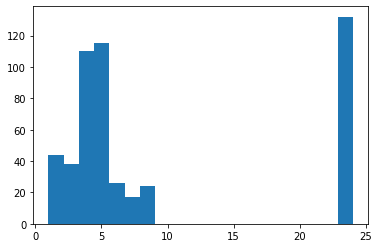

In [51]:
plt.hist(data['RAD'], bins=20)

(array([ 17.,  37.,  38.,  62.,  86.,  22.,  13.,  19.,  47.,  27.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 132.,   5.]),
 array([187. , 213.2, 239.4, 265.6, 291.8, 318. , 344.2, 370.4, 396.6,
        422.8, 449. , 475.2, 501.4, 527.6, 553.8, 580. , 606.2, 632.4,
        658.6, 684.8, 711. ]),
 <BarContainer object of 20 artists>)

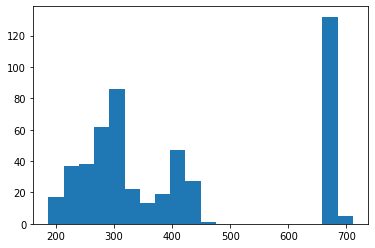

In [52]:
plt.hist(data['TAX'], bins=20)

(array([ 15.,   0.,   1.,   1.,  41.,  17.,   3.,  12.,  26.,   9.,  26.,
         43.,  50.,  26.,  27.,  13., 140.,  38.,  16.,   2.]),
 array([12.6 , 13.07, 13.54, 14.01, 14.48, 14.95, 15.42, 15.89, 16.36,
        16.83, 17.3 , 17.77, 18.24, 18.71, 19.18, 19.65, 20.12, 20.59,
        21.06, 21.53, 22.  ]),
 <BarContainer object of 20 artists>)

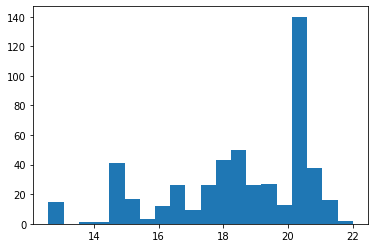

In [53]:
plt.hist(data['PTRATIO'], bins=20)

(array([ 11.,   7.,   3.,   3.,   7.,   3.,   2.,   0.,   2.,   1.,   1.,
          2.,   4.,   3.,   5.,   6.,  10.,  23.,  48., 365.]),
 array([3.20000e-01, 2.01490e+01, 3.99780e+01, 5.98070e+01, 7.96360e+01,
        9.94650e+01, 1.19294e+02, 1.39123e+02, 1.58952e+02, 1.78781e+02,
        1.98610e+02, 2.18439e+02, 2.38268e+02, 2.58097e+02, 2.77926e+02,
        2.97755e+02, 3.17584e+02, 3.37413e+02, 3.57242e+02, 3.77071e+02,
        3.96900e+02]),
 <BarContainer object of 20 artists>)

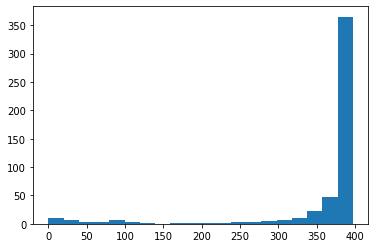

In [54]:
plt.hist(data['B'], bins=20)

(array([22., 53., 55., 53., 60., 39., 46., 38., 36., 28., 19., 11., 12.,
         9.,  6., 10.,  3.,  1.,  3.,  2.]),
 array([ 1.73 ,  3.542,  5.354,  7.166,  8.978, 10.79 , 12.602, 14.414,
        16.226, 18.038, 19.85 , 21.662, 23.474, 25.286, 27.098, 28.91 ,
        30.722, 32.534, 34.346, 36.158, 37.97 ]),
 <BarContainer object of 20 artists>)

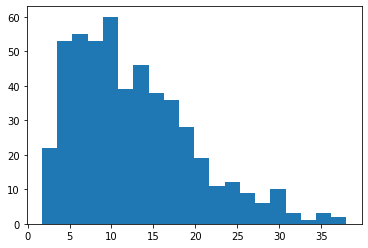

In [55]:
plt.hist(data['LSTAT'], bins=20)

#### Using the min max scaler on all the features

In [27]:
X = np.array(data.iloc[:,0:13])
y = np.array(data.iloc[:,-1]).reshape(-1, 1)
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape,y.shape)

(506, 13) (506, 1)


#### Performing the train-test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Training the model

In [29]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

# Returns the coefficient of determination of the prediction.
# assesses how strong the linear relationship is between two variables

0.6773737540687089


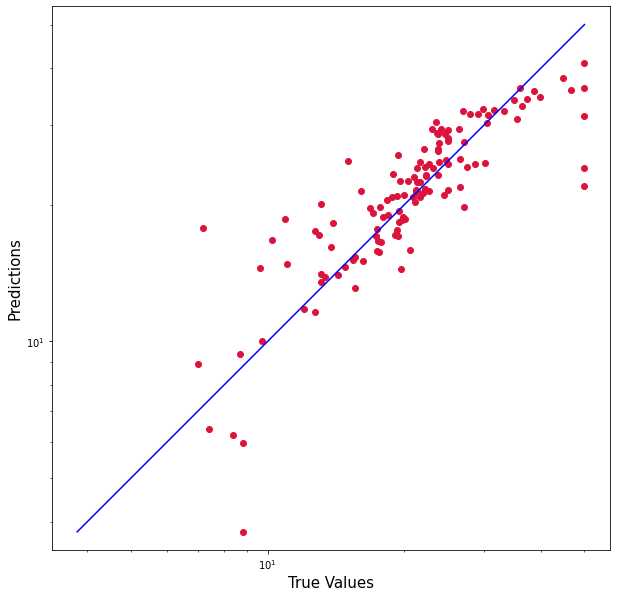

In [30]:
true_value = y_test
predicted_value = regr.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()